# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

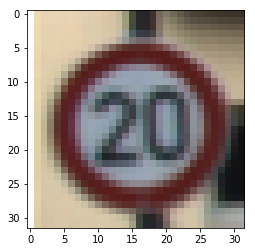

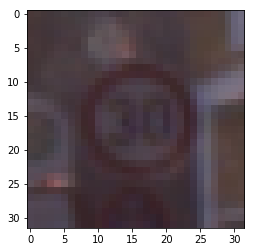

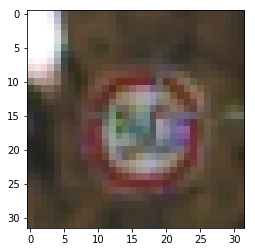

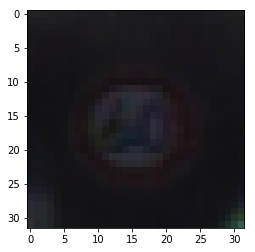

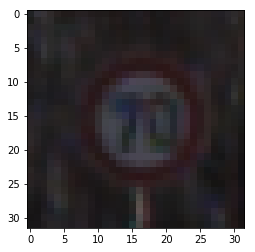

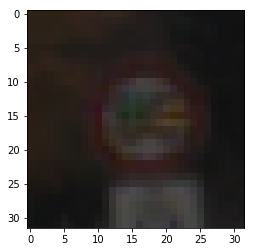

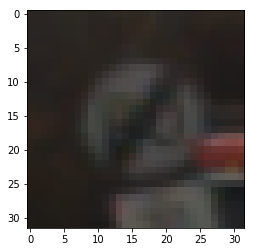

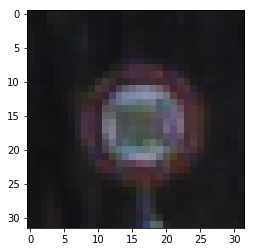

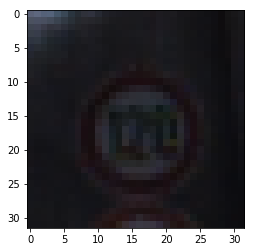

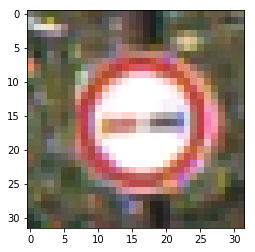

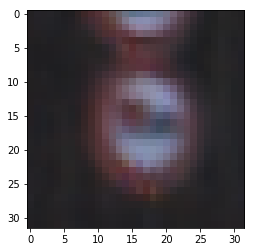

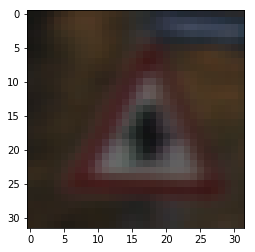

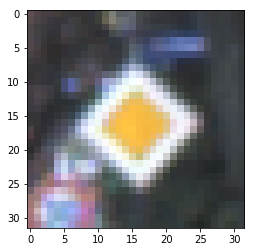

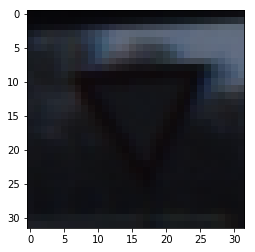

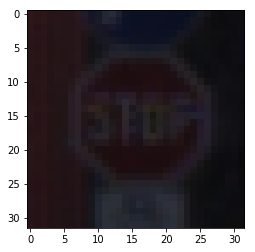

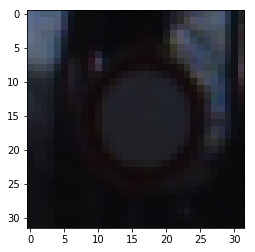

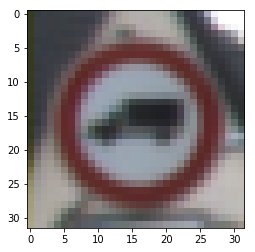

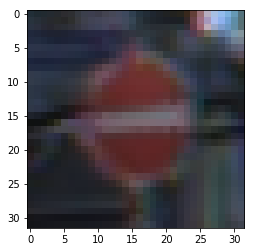

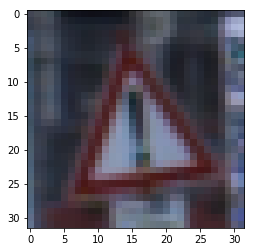

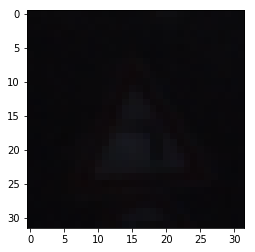

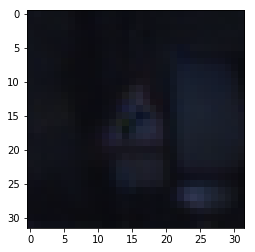

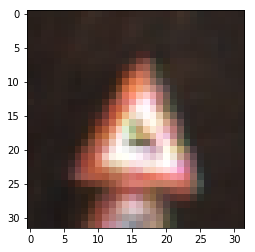

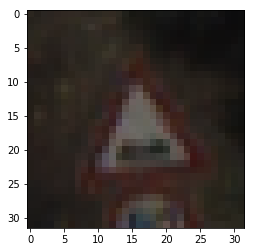

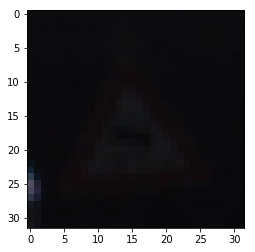

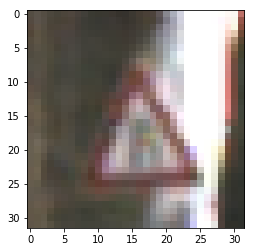

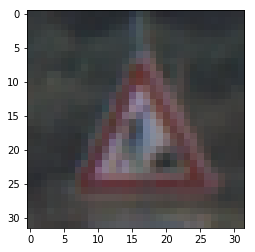

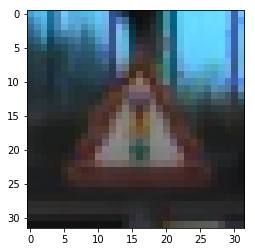

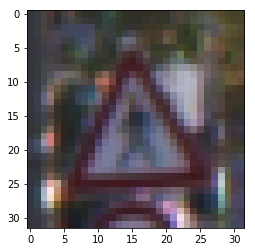

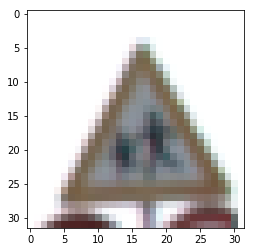

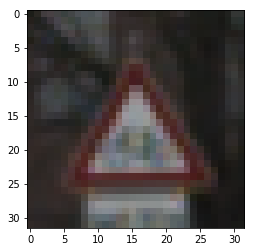

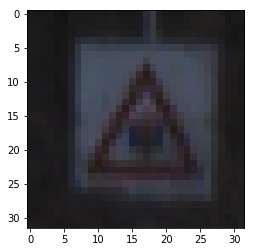

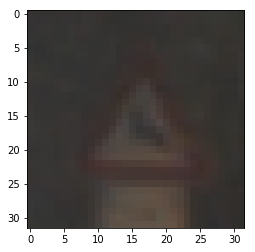

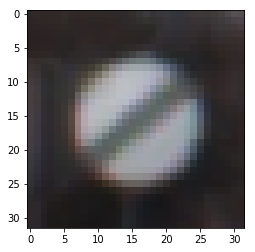

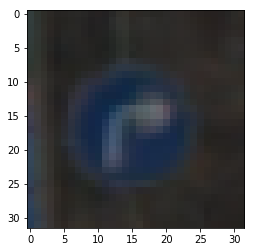

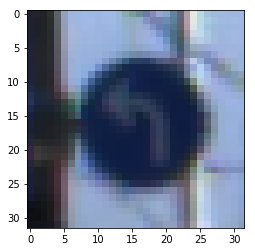

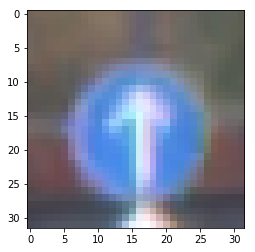

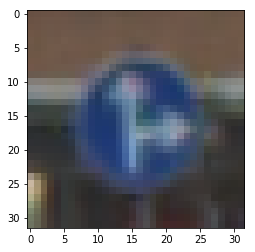

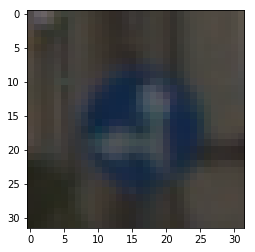

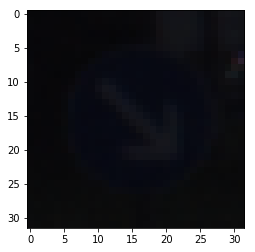

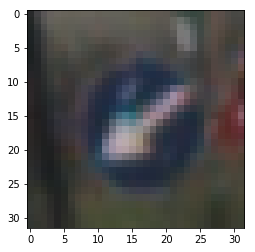

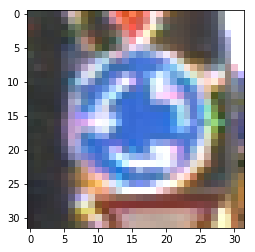

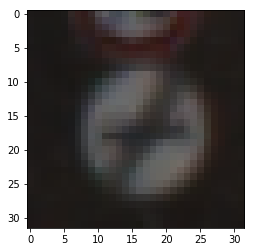

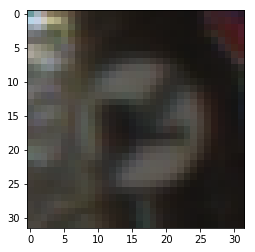

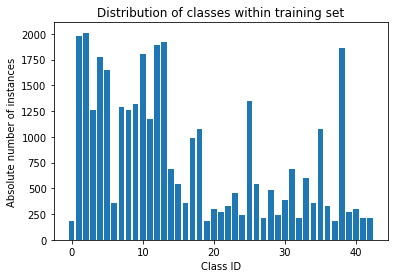

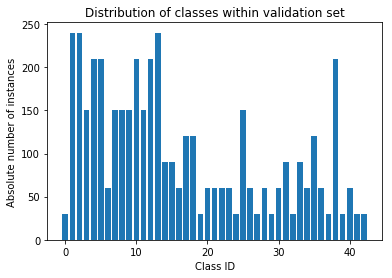

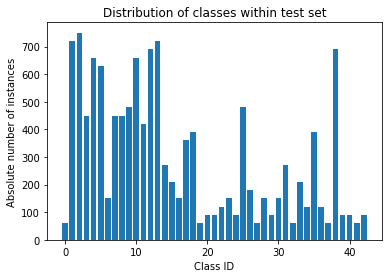

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

u, indices, counts = np.unique(y_train,return_index=True,return_counts=True)

#plot all training traffic sign images (one example of each class)
for i in indices:    
    plt.imshow(X_train[i])
    plt.show()
    
#plot counts of each sign in training set to a diagram
class_id = np.arange(n_classes)
fig, ax = plt.subplots()
plt.title('Distribution of classes within training set')
plt.ylabel('Absolute number of instances')
plt.xlabel("Class ID")
plt.bar(class_id, counts, align='center')
fig.savefig("./output_images/visualization_training.png")
plt.show()



u, indices, counts = np.unique(y_valid,return_index=True,return_counts=True)

#plot counts of each sign in training set to a diagram
class_id = np.arange(n_classes)
fig, ax = plt.subplots()
plt.title('Distribution of classes within validation set')
plt.ylabel('Absolute number of instances')
plt.xlabel("Class ID")
plt.bar(class_id, counts, align='center')
fig.savefig("./output_images/visualization_validation.png")
plt.show()



u, indices, counts = np.unique(y_test,return_index=True,return_counts=True)

#plot counts of each sign in test set to a diagram
class_id = np.arange(n_classes)
fig, ax = plt.subplots()
plt.title('Distribution of classes within test set')
plt.ylabel('Absolute number of instances')
plt.xlabel("Class ID")
plt.bar(class_id, counts, align='center')
fig.savefig("./output_images/visualization_test.png")
plt.show()
    



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

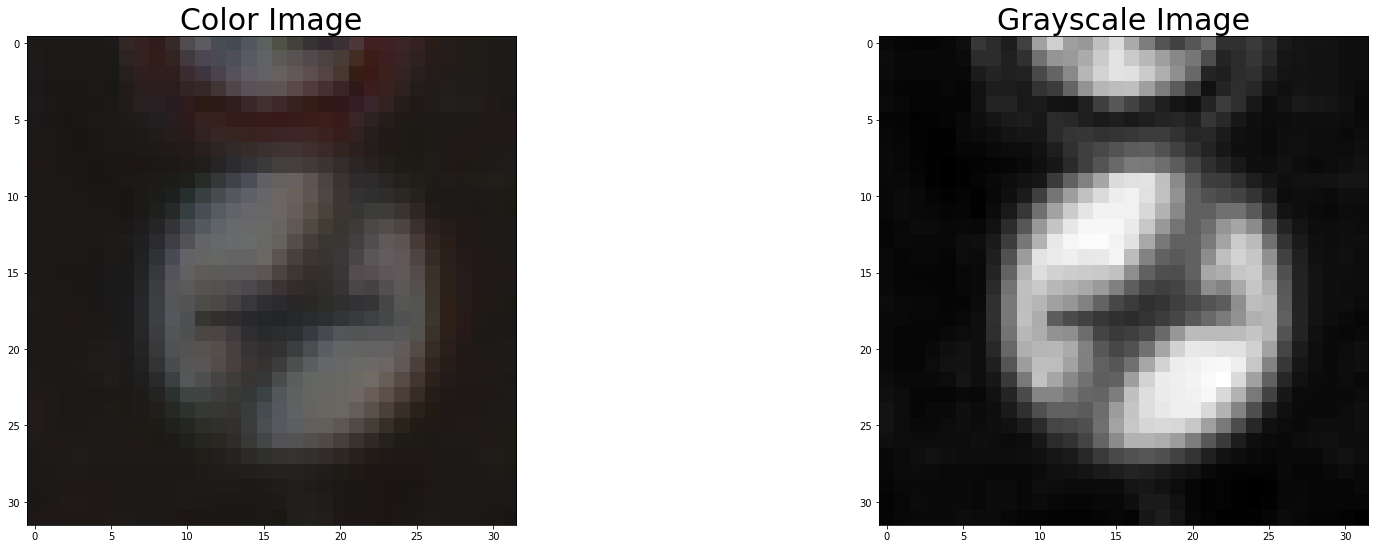

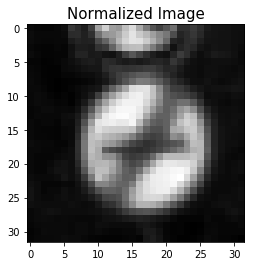

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from skimage import color
from sklearn.utils import shuffle   

X_train_gray = np.zeros((*X_train.shape[:3],1))
X_valid_gray = np.zeros((*X_valid.shape[:3],1))
X_test_gray = np.zeros((*X_test.shape[:3],1))

for i in range(X_train.shape[0]):
    X_train_gray[i,:,:,0] = color.rgb2gray(X_train[i])
    
for i in range(X_valid.shape[0]):
    X_valid_gray[i,:,:,0] = color.rgb2gray(X_valid[i])
    
for i in range(X_test.shape[0]):
    X_test_gray[i,:,:,0] = color.rgb2gray(X_test[i])
    
# example traffic sign image before and after grayscaling
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 9))
ax1.imshow(X_train[0])
ax1.set_title('Color Image', fontsize=30)
ax2.imshow(X_train_gray[0,:,:,0],cmap='gray')
ax2.set_title('Grayscale Image', fontsize=30)
f.savefig("output_images/grayscale.png")
plt.show()
    
#normalize data to have zero mean and equal variance
X_train_norm = (X_train_gray*255 - 128)/128
X_valid_norm = (X_valid_gray*255 - 128)/128
X_test_norm = (X_test_gray*255 - 128)/128

# example traffic sign image after normalization
f, ax = plt.subplots()
ax.imshow(X_train_norm[0,:,:,0],cmap='gray')
ax.set_title('Normalized Image', fontsize=15)
f.savefig("output_images/normalized.png")
plt.show()

#shuffle the training data
X_train_norm, y_train = shuffle(X_train_norm, y_train)

### Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [5]:
import tensorflow as tf

EPOCHS = 500
BATCH_SIZE = 512

### Dropout

In [6]:
keep_prob = tf.placeholder(tf.float32) # probability to keep units (-> dropout mechanism)

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    

    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 64],mu,sigma)),
        'wc2': tf.Variable(tf.truncated_normal([3, 3, 64, 128],mu,sigma)),
        'wd1': tf.Variable(tf.truncated_normal([6*6*128, 512],mu,sigma)),
        'wd2': tf.Variable(tf.truncated_normal([512, 256],mu,sigma)),
        'out': tf.Variable(tf.truncated_normal([256, n_classes],mu,sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([64],mu,sigma)),
        'bc2': tf.Variable(tf.truncated_normal([128],mu,sigma)),
        'bd1': tf.Variable(tf.truncated_normal([512],mu,sigma)),
        'bd2': tf.Variable(tf.truncated_normal([256],mu,sigma)),
        'out': tf.Variable(tf.truncated_normal([n_classes],mu,sigma))}

    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x64.
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID') + biases['bc1']

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 30x30x64. Output = 15x15x64.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

    # TODO: Layer 2: Convolutional. Output = 13x13x128.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID') + biases['bc2']
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 13x13x128. Output = 6x6x128.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # TODO: Flatten. Input = 6x6x128. Output = 4608.
    flat_features = flatten(conv2)

    # TODO: Layer 3: Fully Connected. Input = 4608. Output = 512.
    fc1 = tf.add(tf.matmul(flat_features,weights['wd1']),biases['bd1'])
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 512. Output = 256.
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout.
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 256. Output = 43.
    logits = tf.add(tf.matmul(fc2,weights['out']),biases['out'])
    
    return logits

### Features and Labels
Train LeNet to classify on traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline
Create a training pipeline that uses the model to classify traffic sign data.

In [9]:
rate = 0.001
momentum = 0.9

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.MomentumOptimizer(learning_rate=rate,momentum=momentum)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob_keep=1.):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob_keep})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob_keep})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return (total_accuracy / num_examples), (total_loss/num_examples)

### Train, Validate and Test the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_accuracy, training_loss = evaluate(X_train_norm, y_train, prob_keep=0.5)
        validation_accuracy, validation_loss = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training loss = {:.3f}".format(training_loss))
        print("Validation loss = {:.3f}".format(validation_loss))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './models/lenet.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Training loss = 3.644
Validation loss = 3.577
Training Accuracy = 0.060
Validation Accuracy = 0.094

EPOCH 2 ...
Training loss = 3.561
Validation loss = 3.516
Training Accuracy = 0.073
Validation Accuracy = 0.104

EPOCH 3 ...
Training loss = 3.501
Validation loss = 3.479
Training Accuracy = 0.084
Validation Accuracy = 0.119

EPOCH 4 ...
Training loss = 3.455
Validation loss = 3.435
Training Accuracy = 0.089
Validation Accuracy = 0.126

EPOCH 5 ...
Training loss = 3.417
Validation loss = 3.411
Training Accuracy = 0.101
Validation Accuracy = 0.152

EPOCH 6 ...
Training loss = 3.378
Validation loss = 3.365
Training Accuracy = 0.109
Validation Accuracy = 0.173

EPOCH 7 ...
Training loss = 3.339
Validation loss = 3.336
Training Accuracy = 0.121
Validation Accuracy = 0.186

EPOCH 8 ...
Training loss = 3.302
Validation loss = 3.299
Training Accuracy = 0.129
Validation Accuracy = 0.208

EPOCH 9 ...
Training loss = 3.262
Validation loss = 3.255
Training Accuracy = 0.145

EPOCH 73 ...
Training loss = 0.784
Validation loss = 0.615
Training Accuracy = 0.755
Validation Accuracy = 0.838

EPOCH 74 ...
Training loss = 0.778
Validation loss = 0.603
Training Accuracy = 0.760
Validation Accuracy = 0.837

EPOCH 75 ...
Training loss = 0.765
Validation loss = 0.595
Training Accuracy = 0.762
Validation Accuracy = 0.842

EPOCH 76 ...
Training loss = 0.763
Validation loss = 0.586
Training Accuracy = 0.769
Validation Accuracy = 0.844

EPOCH 77 ...
Training loss = 0.744
Validation loss = 0.584
Training Accuracy = 0.769
Validation Accuracy = 0.840

EPOCH 78 ...
Training loss = 0.733
Validation loss = 0.569
Training Accuracy = 0.774
Validation Accuracy = 0.849

EPOCH 79 ...
Training loss = 0.720
Validation loss = 0.558
Training Accuracy = 0.778
Validation Accuracy = 0.850

EPOCH 80 ...
Training loss = 0.711
Validation loss = 0.551
Training Accuracy = 0.783
Validation Accuracy = 0.852

EPOCH 81 ...
Training loss = 0.705
Validation loss = 0.552
Training Accuracy = 0.782
Val

EPOCH 145 ...
Training loss = 0.359
Validation loss = 0.309
Training Accuracy = 0.892
Validation Accuracy = 0.912

EPOCH 146 ...
Training loss = 0.346
Validation loss = 0.302
Training Accuracy = 0.894
Validation Accuracy = 0.912

EPOCH 147 ...
Training loss = 0.338
Validation loss = 0.303
Training Accuracy = 0.893
Validation Accuracy = 0.913

EPOCH 148 ...
Training loss = 0.340
Validation loss = 0.300
Training Accuracy = 0.895
Validation Accuracy = 0.917

EPOCH 149 ...
Training loss = 0.339
Validation loss = 0.304
Training Accuracy = 0.896
Validation Accuracy = 0.913

EPOCH 150 ...
Training loss = 0.336
Validation loss = 0.298
Training Accuracy = 0.896
Validation Accuracy = 0.915

EPOCH 151 ...
Training loss = 0.340
Validation loss = 0.296
Training Accuracy = 0.896
Validation Accuracy = 0.914

EPOCH 152 ...
Training loss = 0.335
Validation loss = 0.295
Training Accuracy = 0.900
Validation Accuracy = 0.916

EPOCH 153 ...
Training loss = 0.331
Validation loss = 0.291
Training Accuracy = 

EPOCH 217 ...
Training loss = 0.217
Validation loss = 0.224
Training Accuracy = 0.934
Validation Accuracy = 0.930

EPOCH 218 ...
Training loss = 0.216
Validation loss = 0.222
Training Accuracy = 0.935
Validation Accuracy = 0.934

EPOCH 219 ...
Training loss = 0.216
Validation loss = 0.223
Training Accuracy = 0.933
Validation Accuracy = 0.931

EPOCH 220 ...
Training loss = 0.212
Validation loss = 0.224
Training Accuracy = 0.935
Validation Accuracy = 0.933

EPOCH 221 ...
Training loss = 0.216
Validation loss = 0.231
Training Accuracy = 0.935
Validation Accuracy = 0.930

EPOCH 222 ...
Training loss = 0.211
Validation loss = 0.222
Training Accuracy = 0.935
Validation Accuracy = 0.931

EPOCH 223 ...
Training loss = 0.209
Validation loss = 0.222
Training Accuracy = 0.936
Validation Accuracy = 0.933

EPOCH 224 ...
Training loss = 0.211
Validation loss = 0.221
Training Accuracy = 0.935
Validation Accuracy = 0.933

EPOCH 225 ...
Training loss = 0.209
Validation loss = 0.218
Training Accuracy = 

EPOCH 289 ...
Training loss = 0.155
Validation loss = 0.198
Training Accuracy = 0.952
Validation Accuracy = 0.939

EPOCH 290 ...
Training loss = 0.157
Validation loss = 0.198
Training Accuracy = 0.953
Validation Accuracy = 0.939

EPOCH 291 ...
Training loss = 0.151
Validation loss = 0.201
Training Accuracy = 0.953
Validation Accuracy = 0.938

EPOCH 292 ...
Training loss = 0.155
Validation loss = 0.198
Training Accuracy = 0.954
Validation Accuracy = 0.941

EPOCH 293 ...
Training loss = 0.157
Validation loss = 0.199
Training Accuracy = 0.954
Validation Accuracy = 0.939

EPOCH 294 ...
Training loss = 0.152
Validation loss = 0.197
Training Accuracy = 0.954
Validation Accuracy = 0.938

EPOCH 295 ...
Training loss = 0.151
Validation loss = 0.194
Training Accuracy = 0.953
Validation Accuracy = 0.940

EPOCH 296 ...
Training loss = 0.149
Validation loss = 0.193
Training Accuracy = 0.954
Validation Accuracy = 0.940

EPOCH 297 ...
Training loss = 0.154
Validation loss = 0.196
Training Accuracy = 

EPOCH 361 ...
Training loss = 0.119
Validation loss = 0.180
Training Accuracy = 0.963
Validation Accuracy = 0.946

EPOCH 362 ...
Training loss = 0.113
Validation loss = 0.179
Training Accuracy = 0.963
Validation Accuracy = 0.946

EPOCH 363 ...
Training loss = 0.116
Validation loss = 0.178
Training Accuracy = 0.963
Validation Accuracy = 0.945

EPOCH 364 ...
Training loss = 0.120
Validation loss = 0.183
Training Accuracy = 0.966
Validation Accuracy = 0.944

EPOCH 365 ...
Training loss = 0.119
Validation loss = 0.181
Training Accuracy = 0.964
Validation Accuracy = 0.946

EPOCH 366 ...
Training loss = 0.114
Validation loss = 0.178
Training Accuracy = 0.964
Validation Accuracy = 0.947

EPOCH 367 ...
Training loss = 0.120
Validation loss = 0.178
Training Accuracy = 0.964
Validation Accuracy = 0.946

EPOCH 368 ...
Training loss = 0.114
Validation loss = 0.176
Training Accuracy = 0.964
Validation Accuracy = 0.946

EPOCH 369 ...
Training loss = 0.115
Validation loss = 0.177
Training Accuracy = 

EPOCH 433 ...
Training loss = 0.093
Validation loss = 0.173
Training Accuracy = 0.972
Validation Accuracy = 0.947

EPOCH 434 ...
Training loss = 0.096
Validation loss = 0.172
Training Accuracy = 0.970
Validation Accuracy = 0.947

EPOCH 435 ...
Training loss = 0.095
Validation loss = 0.169
Training Accuracy = 0.973
Validation Accuracy = 0.949

EPOCH 436 ...
Training loss = 0.094
Validation loss = 0.171
Training Accuracy = 0.973
Validation Accuracy = 0.947

EPOCH 437 ...
Training loss = 0.094
Validation loss = 0.168
Training Accuracy = 0.973
Validation Accuracy = 0.949

EPOCH 438 ...
Training loss = 0.097
Validation loss = 0.170
Training Accuracy = 0.972
Validation Accuracy = 0.948

EPOCH 439 ...
Training loss = 0.092
Validation loss = 0.171
Training Accuracy = 0.972
Validation Accuracy = 0.949

EPOCH 440 ...
Training loss = 0.091
Validation loss = 0.174
Training Accuracy = 0.973
Validation Accuracy = 0.948

EPOCH 441 ...
Training loss = 0.093
Validation loss = 0.170
Training Accuracy = 

In [12]:
with tf.Session() as sess:
    saver.restore(sess, './models/lenet.ckpt')

    test_accuracy, test_loss = evaluate(X_test_norm, y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./models/lenet.ckpt
Test loss = 0.205
Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")